In [2]:
import os

In [3]:
def get_xml_paths_for_complexes(folder):
    #example usage: folder = protein_ligand_pdb/xml
    
    complexes_folder = os.listdir(folder)
    full_xml_paths = []
    
    for complex_folder in complexes_folder:
        full_xml_paths.append(f'{folder}/{complex_folder}/report.xml')
    
    return full_xml_paths
get_xml_paths_for_complexes('protein_ligand_pdb/xml')

['protein_ligand_pdb/xml/CYP3A4-I301F_3035604_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-F304A_4192_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-L373V_566440_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-P107S_6013_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-I369F_3035604_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4.11_6013_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-T309A_848780_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-S119A_4192_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-S119A_3035604_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-I369V_14403_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-F304A_4993_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4.12_5994_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-T309C_4192_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-T309V_6013_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-C98A_4192_complex/report.xml',
 'protein_ligand_pdb/xml/CYP3A4-S

In [4]:
import xml.etree.ElementTree as ET
    
xml_tree = ET.parse('protein_ligand_pdb/xml/CYP3A4-I120L_6013_complex/report.xml')
root = xml_tree.getroot()
    
non_covalent_interaction_subtree = root.findall("./bindingsite/[@id='2']/interactions")

for ele in lig_non_covalent_subtree[0].findall('hydrogen_bonds')[0]:
    print(ele)
    print(type(ele.findall('ligcoo')[0].findall('x')[0].text))
    print(ele.findall('protcoo'))
    print(ele.findall('watercoo'))

NameError: name 'lig_non_covalent_subtree' is not defined

In [5]:
list(list(lig_non_covalent_subtree[0])[1]) # if no child len is 0, else len > 0

NameError: name 'lig_non_covalent_subtree' is not defined

In [6]:
for child in list(lig_non_covalent_subtree[0])[1]:
    lst = []
    for child_n in child:
        #lst.append(child.findall('ligcoo'))
        #lst.append(child.findall('protcoo'))
        #lst.append(child.findall('watercoo'))
        #print(child_n)
    print(lst)
    
    break

IndentationError: expected an indented block (<ipython-input-6-403d2df2f39a>, line 8)

In [13]:
def get_atom_info_from_coord(complex_pdb_file, coord, coord_tag_name):
    #coord is an iterable of string in [x,y,z] or (x,y,z)
    #complex_pdb_file is eg: /path/to/pdb.pdb which contains ligand and receptor coords and must be an absolute path
    import re
    
    x,y,z = coord
    
    """
    
    from pdb, we can get info about element, atom id,
    residue (if applicable) and if entry belongs to a lig, het or protein
    
    """
    
    atom_info = {'element_type': None, 'residue_type': None, 'hydrophobic_interactions': 0,
                 'hydrogen_bonds':0, 'water_bridges': 0, 'pi_stacks':0,
                 'pi_cation_interactions':0, 'halogen_bonds': 0, 'salt_bridges': 0,
                 'metal_complexes': 0
                 
                }
    
    atom_id = ''
    pattern = re.compile('^TER')
    
    with open(complex_pdb_file, 'r') as file:
        
        lines = file.readlines()
        
        for line in lines:
            
            if pattern.match(line):
                continue
            tokens = re.split("\s{1,}", line)
            
            #print(tokens)
            #print(tokens, coord)
            #check if the coords fit
            if coord_tag_name == 'protcoo' and tokens[6] == x and tokens[7] == y and tokens[8] == z:
                
                element_type = tokens[10]
                atom_info['element_type'] = element_type 
                
                #if we have ATOM in a line, we are ensure it's the entry of the protein/receptor
                
                residue_code = tokens[3]
                atom_info['residue_type'] = residue_code #then we just get the 3 letter residue code
                atom_id = f'prot_atm_{tokens[1]}'
            
            elif coord_tag_name == 'ligcoo' and tokens[5] == x and tokens[6] == y and tokens[7] == z:
                element_type = tokens[11]
                atom_info['element_type'] = element_type 
                atom_id = f'lig_atm_{tokens[1]}'
            
            elif coord_tag_name == 'watercoo' and tokens[6] == x and tokens[7] == y and tokens[8] == z:
                element_type = tokens[11]
                atom_info['element_type'] = element_type 
                atom_id = f'het_atm_{tokens[1]}'
                
                
    
    return (atom_id, atom_info)

def get_coord_given_tag(tag, coord_tag_name):
    if len(tag.findall(coord_tag_name)) == 0:
        return None
    x = tag.findall(coord_tag_name)[0].findall('x')[0].text
    y = tag.findall(coord_tag_name)[0].findall('y')[0].text
    z = tag.findall(coord_tag_name)[0].findall('z')[0].text
    return (x,y,z)

def get_feature_vectors_for_a_complex(xml_file_path, complex_pdb_folder='protein_ligand_pdb', x_path="./bindingsite/[@id='2']/interactions"):
    
    
    #xml_file must a full path, for eg: protein_ligand_pdb/xml/CYP3A4-S119A_4192_complex/report.xml
    #x_path, for eg, ./bindingsite/[@id='2']/interactions
    
    import xml.etree.ElementTree as ET
    import os
    
    xml_tree = ET.parse(xml_file_path)
    root = xml_tree.getroot()
    
    non_covalent_interaction_subtree = root.findall(x_path)
    path_tokens = xml_file_path.split('/')
    
    complex_pdb_file_name = f'{path_tokens[2]}.pdb'
    full_complex_pdb_file_path = os.path.join(complex_pdb_folder, complex_pdb_file_name)
    
    #non_covalent subtree must have 1 child tag, otherwise sth is wrong
    if len(non_covalent_interaction_subtree) > 1 or len(non_covalent_interaction_subtree) < 1:
        print(f'sth is wrong with {xml_file_path}')
        return
    
    non_covalent_interaction_tag_names = ['hydrophobic_interactions', 'hydrogen_bonds', 'water_bridges', 
                                          'salt_bridges', 'pi_stacks', 'pi_cation_interactions', 
                                          'halogen_bonds', 'metal_complexes'
                                         ]
    
    coord_tag_names = ['ligcoo', 'protcoo', 'watercoo']
    atom_id_coord_map = {}
    atoms_and_features_map = {} #key atom id from pdb, value: {'atom_type': 'H', .. etc}
    
    for non_covalent_interaction_tag_name in non_covalent_interaction_tag_names:
        
        #for eg:for ele in lig_non_covalent_subtree[0].findall('hydrogen_bonds')[0]
        for individual_interaction_tag in non_covalent_interaction_subtree[0].findall(non_covalent_interaction_tag_name)[0]:
            print(non_covalent_interaction_tag_name)
            
            for coord_tag_name in coord_tag_names:
                
                coord = get_coord_given_tag(individual_interaction_tag, coord_tag_name)

                    
                if coord == None:
                    continue
                    
                atom_id, atom_info_map = get_atom_info_from_coord(full_complex_pdb_file_path, coord, coord_tag_name)
                
                atom_id_coord_map[atom_id] = coord
                
                if coord_tag_name == 'ligcoo':
                    print('hi',coord, atom_id)
                    
                #if the atom_id reppear, origin_type will stay the same
                #but there is a new non-covalent interactions
                if atom_id in atoms_and_features_map:
                    atoms_and_features_map[atom_id][non_covalent_interaction_tag_name] = 1
                    continue
                    
                if coord_tag_name == 'ligcoo':
                    atom_info_map['origin_type'] = 'lig'
                    
                elif coord_tag_name == 'protcoo':
                    atom_info_map['origin_type'] = 'prot'
                    
                elif coord_tag_name == 'watercoo':
                    atom_info_map['origin_type'] = 'het'
                    
                atom_info_map[non_covalent_interaction_tag_name] = 1
                atoms_and_features_map[atom_id] = atom_info_map
    
    return atoms_and_features_map, atom_id_coord_map
        

data_map, atom_id_coord_map = get_feature_vectors_for_a_complex(xml_file_path='protein_ligand_pdb/xml/CYP3A4-A370F_3035604_complex/report.xml')
atom_id_coord_map

hydrogen_bonds
hi ('-21.041', '-20.304', '-14.444') lig_atm_11
hydrogen_bonds
hi ('-23.823', '-24.061', '-15.347') lig_atm_1
hydrogen_bonds
hi ('-23.823', '-24.061', '-15.347') lig_atm_1
hydrogen_bonds
hi ('-21.041', '-20.304', '-14.444') lig_atm_11


{'lig_atm_11': ('-21.041', '-20.304', '-14.444'),
 'prot_atm_1466': ('-22.494', '-19.499', '-11.466'),
 'lig_atm_1': ('-23.823', '-24.061', '-15.347'),
 'prot_atm_2255': ('-23.343', '-27.451', '-17.477'),
 'prot_atm_2715': ('-22.393', '-20.498', '-18.287')}

In [8]:
import re

with open('protein_ligand_pdb/CYP3A4.12_848780_complex.pdb', 'r') as file:
    line = file.readlines()[0].strip()
    print(re.split("\s{1,}", line))

['ATOM', '1', 'N', 'HIS', 'A', '28', '-30.070', '8.178', '-13.891', '1.00', 'N']


In [9]:
import numpy as np

rows = len(data_map)
columns = len(data_map['lig_atm_11'])

feature_matrix = []

origin_type_map = {'het': 0 , 'prot':1, 'lig':2}

residue_type_map = {None:0, 'Ala': 1,
          'Arg': 2,
          'Asn': 3,
          'Asp': 4,
          'Cys': 5,
          'Glu': 6,
          'Gln': 7,
          'Gly': 8,
          'His': 9,
          'Ile': 10,
          'Leu': 11,
          'Lys': 12,
          'Met': 13,
          'Phe': 14,
          'Pro': 15,
          'Ser': 16,
          'Thr': 17,
          'Trp': 18,
          'Tyr': 19,
          'Val': 20}

ele_type_map = {'OA': 1, 'O': 1 , 'NA': 2, 'N':2}

atom_row_index_map = {}

row = 0

for vertex in data_map:
    
    features_map = data_map[vertex]
    feature_vector = []
    
    for feature in sorted(features_map.keys()):
        feature_value = features_map[feature]
        
        if feature == 'origin_type':
            origin_type_encoding = origin_type_map[feature_value]
            feature_vector.append(origin_type_encoding)
            
        elif feature == 'residue_type':
            if feature_value is not None:
                feature_value = feature_value.capitalize()
                
            res_type_encoding = residue_type_map[feature_value]
            feature_vector.append(res_type_encoding)
            
        elif feature == 'element_type':
            ele_type_encoding = ele_type_map[feature_value]
            feature_vector.append(ele_type_encoding)
            
        
        else:
            feature_vector.append(feature_value)
            
    atom_row_index_map[row] = vertex
    row += 1
    feature_matrix.append(feature_vector)

feature_matrix = np.array(feature_matrix)
print(feature_matrix)
print(atom_row_index_map)

[[ 1  0  1  0  0  2  0  0  0  0  0]
 [ 2  0  1  0  0  1  0  0  2  0  0]
 [ 2  0  1  0  0  2  0  0  0  0  0]
 [ 1  0  1  0  0  1  0  0 16  0  0]
 [ 1  0  1  0  0  1  0  0 10  0  0]]
{0: 'lig_atm_11', 1: 'prot_atm_1466', 2: 'lig_atm_1', 3: 'prot_atm_2255', 4: 'prot_atm_2715'}


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

reduced_mat = pca.fit_transform(feature_matrix)

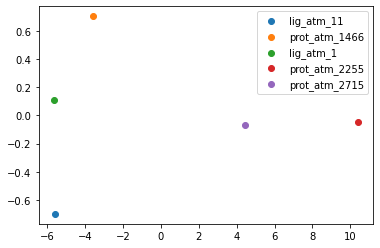

In [11]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(len(feature_matrix)):
    plt.scatter(reduced_mat[i,0], reduced_mat[i,1], label=atom_row_index_map[i])
plt.legend()

In [12]:
import numpy as np
num_atoms = len(data_map)
adj_matrix = []
